# SQL QUERY

In [1]:
# WITH TransfersPerDay AS (
#   SELECT
#     from_address,
#     token_address,
#     block_timestamp
#   FROM
#    bigquery-public-data.crypto_ethereum.token_transfers
#   WHERE
#     block_timestamp >= '2024-06-01 00:00:00 UTC'
#   AND from_address NOT IN (
#     SELECT address
#     FROM
#       bigquery-public-data.crypto_ethereum.contracts
#   )
# ),
# TransactionsPerAddressToken AS (
#   SELECT
#     from_address,
#     token_address,
#     ARRAY_AGG(DISTINCT block_timestamp ORDER BY block_timestamp ASC) AS block_timestamps
#   FROM
#   TransfersPerDay
#   GROUP BY
#     from_address,
#     token_address
# )
# SELECT
#   *
# FROM
#   TransactionsPerAddressToken
# ORDER BY
#   from_address, token_address ;

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import feature_extraction
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
# df = pd.read_csv("/content/drive/MyDrive/Fichiers/2.Scolarité/1. Jedha_Data_Science/PROJETS/DEMO_DAY/Dataset_src_02/2023-01-15___2023_02-01.csv")
df = pd.read_csv(r"G:\Mon Drive\Fichiers\2.Scolarité\1. Jedha_Data_Science\PROJETS\DEMO_DAY\Dataset_src_02\2023-01-15___2023_02-01.csv")

In [11]:
df

,timestamp,wallet_address,token_address,balance
0,2023-01-19,0xeec9a835df1298587348b5c01048aac2277f340a,0xfe5a28f19934851695783a0c8ccb25d678bb05d3,3.993000e-11
1,2023-01-19,0xeea18c07617cedac2762361231bb908e8b05b17f,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,5.129000e-05
2,2023-01-19,0x3b3fc1f418bef741a954403e5c6cce50df4349e9,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,1.501998e-05
3,2023-01-19,0xb5bbffd7d19e0ed0e4e29f86fb6c70a8379666d4,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,-1.037005e-05
4,2023-01-19,0x1ea014d19b2be0411c996842486420250fb7c9aa,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,-1.073201e-04
...,...,...,...,...
6700654,2023-01-23,0xef843bea95ec79e73b2493770b56fe96139d9b57,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-9.597521e+02
6700655,2023-01-23,0x56d181d06d80592da8be947fb0ddd40a816e4fdc,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.054467e+03
6700656,2023-01-23,0xaf162bf5c9a8413a8628e630f961273d7f3270ab,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.047172e+03
6700657,2023-01-23,0x7a84078b1813251430e92051cbb615a313378888,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.044350e+03


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700659 entries, 0 to 6700658
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   timestamp       object 
 1   wallet_address  object 
 2   token_address   object 
 3   balance         float64
dtypes: float64(1), object(3)
memory usage: 204.5+ MB


In [13]:
df["token_address"].value_counts()

token_address
0xdac17f958d2ee523a2206206994597c13d831ec7    1077505
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48     498756
0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2     201486
0x514910771af9ca656af840dff83e8264ecf986ca     114706
0xdc09ef6ba2a135b350d3d05c409497485d8b0a00     112453
                                               ...   
0xef53b5ba2afb19a8d89ce93b8122d43145932c2a          1
0x805f78d21804bb519a6f2a3d349bed98f9de4fef          1
0xfeabf506f8fcd147d3ed65cc81b82ef87d85df96          1
0xdbd0ff2954abc725336a1b60f6c0a2341703bbdf          1
0x0968c90198f08b67365840fa37631b29fe2aa9fc          1
Name: count, Length: 56610, dtype: int64

In [14]:
print(df["token_address"].nunique())
print((df["token_address"].value_counts()>=100).sum())

56610
5336


In [15]:
print(df["wallet_address"].nunique())
print((df["wallet_address"].value_counts()>=100).sum())


2328444
1364


In [16]:
print(df.isnull().sum())

timestamp         0
wallet_address    0
token_address     0
balance           0
dtype: int64


# PREPROCESS_v1_feature_eng

In [17]:
dataset = df.copy()

In [18]:
# dataset = dataset.sample(n=500000)

In [19]:
dataset['wallet_address'] = dataset['wallet_address'].astype(str)
dataset['token_address'] = dataset['token_address'].astype(str)
dataset["day"] = pd.to_datetime(dataset['timestamp'],format='%Y-%m-%d')
dataset['month'] = pd.to_datetime(dataset['timestamp']).dt.month
dataset['day_of_week'] = pd.to_datetime(dataset['timestamp']).dt.dayofweek

In [20]:
dataset

,timestamp,wallet_address,token_address,balance,day,month,day_of_week
0,2023-01-19,0xeec9a835df1298587348b5c01048aac2277f340a,0xfe5a28f19934851695783a0c8ccb25d678bb05d3,3.993000e-11,2023-01-19,1,3
1,2023-01-19,0xeea18c07617cedac2762361231bb908e8b05b17f,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,5.129000e-05,2023-01-19,1,3
2,2023-01-19,0x3b3fc1f418bef741a954403e5c6cce50df4349e9,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,1.501998e-05,2023-01-19,1,3
3,2023-01-19,0xb5bbffd7d19e0ed0e4e29f86fb6c70a8379666d4,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,-1.037005e-05,2023-01-19,1,3
4,2023-01-19,0x1ea014d19b2be0411c996842486420250fb7c9aa,0x99a9b7c1116f9ceeb1652de04d5969cce509b069,-1.073201e-04,2023-01-19,1,3
...,...,...,...,...,...,...,...
6700654,2023-01-23,0xef843bea95ec79e73b2493770b56fe96139d9b57,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-9.597521e+02,2023-01-23,1,0
6700655,2023-01-23,0x56d181d06d80592da8be947fb0ddd40a816e4fdc,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.054467e+03,2023-01-23,1,0
6700656,2023-01-23,0xaf162bf5c9a8413a8628e630f961273d7f3270ab,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.047172e+03,2023-01-23,1,0
6700657,2023-01-23,0x7a84078b1813251430e92051cbb615a313378888,0x5ee84583f67d5ecea5420dbb42b462896e7f8d06,-1.044350e+03,2023-01-23,1,0


In [21]:
dataset = dataset.drop(columns = "timestamp")

### Day_transaction_cos_sin

In [45]:
# day_transaction = dataset.groupby('wallet_address')['day_of_week'].agg(lambda x: x.mode().max())
# day_transaction_df = day_transaction.to_frame(name="day_val")
day_transaction_df['day_of_week_sin'] = np.sin(2 * np.pi * day_transaction_df["day_val"] / 7)
day_transaction_df['day_of_week_cos'] = np.cos(2 * np.pi * day_transaction_df["day_val"] / 7)

print(day_transaction_df.index.nunique())
print(day_transaction_df["day_val"].nunique())

In [46]:
day_transaction_df

,day_of_week_sin,day_of_week_cos
wallet_address,,
0x0000000000000000000000000000000000000000,0.000000,1.000000
0x0000000000000000000000000000000000000001,0.000000,1.000000
0x0000000000000000000000000000000000000002,0.000000,1.000000
0x0000000000000000000000000000000000000003,0.000000,1.000000
0x0000000000000000000000000000000000000004,0.000000,1.000000
...,...,...
0xffffff46eeb8b840e2254d1fa9b1de6a17ce88ff,0.781831,0.623490
0xffffff5800b709071d4adc74759ae4b89bef2a9d,-0.433884,-0.900969
0xffffffff5c1f4a12c4552073e8d90f3a391bf7cc,0.974928,-0.222521


In [28]:
print(day_transaction_df.index.nunique())
print(day_transaction_df["day_of_week_sin"].nunique())
print(day_transaction_df["day_of_week_cos"].nunique())

2328444
7
7


## K-Means_Test_1

In [66]:
# dataset_kmeans_1 = pd.concat([total_transaction_df, u_token_df], axis=1)

In [67]:
dataset_kmeans_1

,total_wallet_transactions,log_total_wallet_transactions,tokens_by_wallet,log_tokens_by_wallet
wallet_address,,,,
0x0000000000000000000000000000000000000000,82117,11.315913,31387,10.354181
0x0000000000000000000000000000000000000001,115,4.753590,40,3.713572
0x0000000000000000000000000000000000000002,8,2.197225,7,2.079442
0x0000000000000000000000000000000000000003,5,1.791759,5,1.791759
0x0000000000000000000000000000000000000004,5,1.791759,5,1.791759
...,...,...,...,...
0xffffff46eeb8b840e2254d1fa9b1de6a17ce88ff,4,1.609438,2,1.098612
0xffffff5800b709071d4adc74759ae4b89bef2a9d,1,0.693147,1,0.693147
0xffffffff5c1f4a12c4552073e8d90f3a391bf7cc,2,1.098612,2,1.098612


In [70]:
numerical_features = dataset_kmeans_1[["XXXXX"]]
scaler = StandardScaler()
standardized_features = scaler.fit_transform(numerical_features)

In [71]:
dataset_kmeans_1

,log_total_wallet_transactions,log_tokens_by_wallet
wallet_address,,
0x0000000000000000000000000000000000000000,11.315913,10.354181
0x0000000000000000000000000000000000000001,4.753590,3.713572
0x0000000000000000000000000000000000000002,2.197225,2.079442
0x0000000000000000000000000000000000000003,1.791759,1.791759
0x0000000000000000000000000000000000000004,1.791759,1.791759
...,...,...
0xffffff46eeb8b840e2254d1fa9b1de6a17ce88ff,1.609438,1.098612
0xffffff5800b709071d4adc74759ae4b89bef2a9d,0.693147,0.693147
0xffffffff5c1f4a12c4552073e8d90f3a391bf7cc,1.098612,1.098612


In [74]:
wcss =  []
k = []

for i in range (2,12):
    kmeans = KMeans(n_clusters= i, random_state = 0, n_init = 25)
    kmeans.fit(dataset_kmeans_1)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=2 --> 450696.2640363008
WCSS for K=3 --> 249691.50607659286
WCSS for K=4 --> 165286.97327735828
WCSS for K=5 --> 124853.9220935237
WCSS for K=6 --> 97808.372962754
WCSS for K=7 --> 74030.44046949381
WCSS for K=8 --> 60124.172708338374


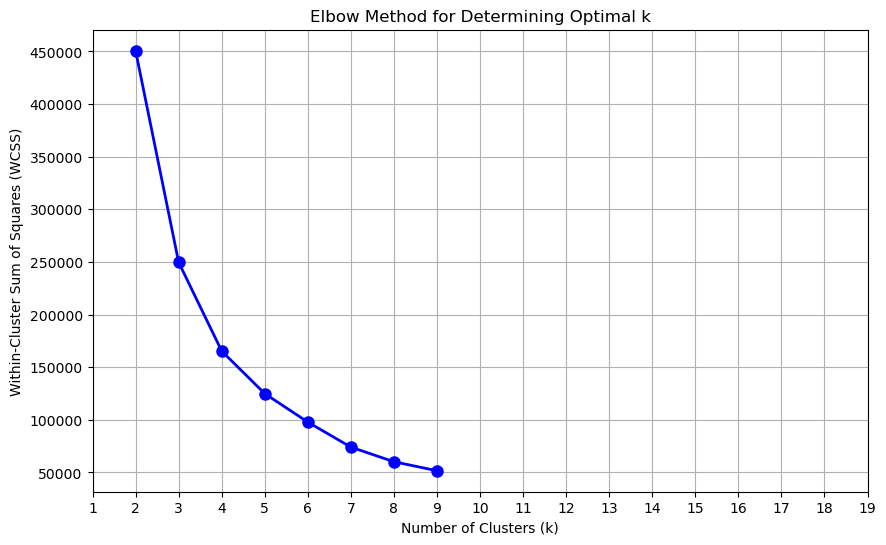

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(k, wcss, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal k')
plt.xticks(range(1, 20))
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeans.fit(dataset_kmeans_1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [ ]:
dataset_kmeans_1.shape
dataset_kmeans_1['cluster_label_kmeans'] = kmeans.labels_
dataset_kmeans_1["cluster_label_kmeans"].value_counts()

(2328444, 5)

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(dataset_kmeans_1)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['Cluster'] = kmeans.labels_

# Create a 3D figure and subplot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Create the scatter plot with Seaborn, passing the 3D subplot (ax)
x = pca_df['PCA1']
y = pca_df['PCA2']
z = pca_df['PCA3']

# Create the scatter plot
ax.scatter(x=x, y=y, z=z, c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.7, ax=ax)

# Add labels and title
ax.set_title('K-Means Clustering of Wallets (PCA-Reduced Dimensions)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# from sklearn.metrics import silhouette_score

# sil = []
# k = []

# for i in range (2,11):
#     kmeans = KMeans(n_clusters= i, random_state = 0, n_init = 'auto')
#     kmeans.fit(dataset_kmeans_1)
#     sil.append(silhouette_score(dataset_kmeans_1, kmeans.predict(dataset_kmeans_1)))
#     k.append(i)
#     print("Silhouette score for K={} is {}".format(i, sil[-1]))

In [ ]:
# silhouette_score(dataset_kmeans_1, y_kmeans)